In [28]:
import os
import cv2
import warnings
import numpy as np
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
warnings.filterwarnings('ignore')
DAT_PATH = 'dataset/'
TARGET = 'MAP'
random_seed = 42
IMG_WIDTH = 256
IMG_HEIGHT = 256
n_split= 0.75

In [29]:
IMPATH = DAT_PATH+'ISIC2018_Task1-2_Training_Input/'
SEGPATH = DAT_PATH+'ISIC2018_Task1_Training_GroundTruth/' 
ATRPATH = DAT_PATH+'ISIC2018_Task2_Training_GroundTruth_v3/'



INPATH = DAT_PATH+'IMAGES/'
OUPATH = DAT_PATH+TARGET+'/'

filenames = ['ISIC_0010332.jpg','ISIC_0000013.jpg','ISIC_0000111.jpg']


In [30]:
def create_folder(path,name):
    import os
    try:
        path=path+name
        os.mkdir(path)
    except OSError:
        print ("Exist or Failed the directory %s" % path)
    else:
        print ("Successfully created the directory %s " % path)

In [31]:
create_folder(OUPATH,'')
create_folder(INPATH,'')
create_folder('images','')
create_folder('results','')
create_folder('results/','output_'+TARGET)
create_folder('results/','checkpoints_'+TARGET)

Exist or Failed the directory dataset/MAP/
Exist or Failed the directory dataset/IMAGES/
Exist or Failed the directory images
Exist or Failed the directory results
Exist or Failed the directory results/output_MAP
Exist or Failed the directory results/checkpoints_MAP


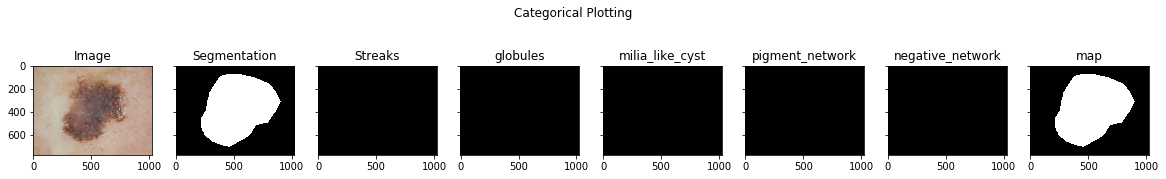

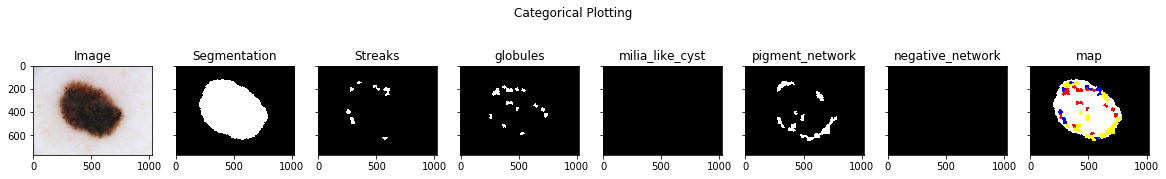

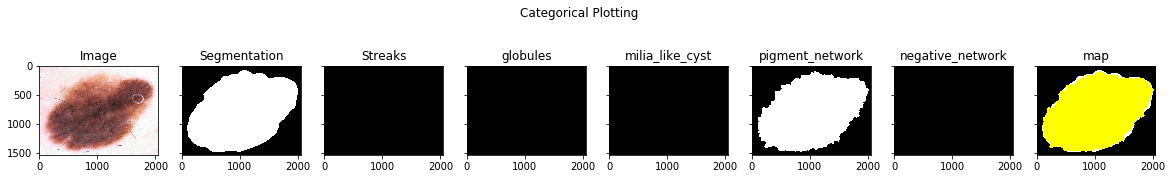

In [32]:
for filename in filenames:
    img = cv2. imread(IMPATH+filename)
    seg = cv2. imread(SEGPATH+filename[:12]+'_segmentation.png')
    streak = cv2.imread(ATRPATH+filename[:12]+'_attribute_streaks.png')
    globules = cv2.imread(ATRPATH+filename[:12]+'_attribute_globules.png')
    milia =  cv2.imread(ATRPATH+filename[:12]+'_attribute_milia_like_cyst.png')
    pigment = cv2.imread(ATRPATH+filename[:12]+'_attribute_pigment_network.png')
    negative = cv2.imread(ATRPATH+filename[:12]+'_attribute_negative_network.png')

    map_image = np.zeros(img.shape, dtype=int)
    # PARA ESCOGER LOS COLORES QUE DESEES  -> https://htmlcolorcodes.com/es/
    map_image[seg[:,:,1]>0,:]=[255,255,255] # WHITE
    if(TARGET == 'MAP'):
        map_image[globules[:,:,1]>0,:] = [255,0,0] # RED
        map_image[milia[:,:,1]>0,:] = [0,128,0]  # GREEN  
        map_image[pigment[:,:,1]>0,:] = [255,255,0]  # YELLOW
        map_image[streak[:,:,1]> 0,:] = [0,0,255]  # BLUE
        map_image[negative[:,:,1]>0,:] = [0,255,255] # AQUA
        
        
    map_image = Image.fromarray(np.uint8(map_image))
    #map_image.thumbnail((IMG_HEIGHT, IMG_WIDTH), Image.ANTIALIAS)
    map_image = np.array(map_image)
    #map_image = cv2.resize(map_image, (IMG_HEIGHT, IMG_WIDTH))

    if(TARGET == 'MAP'):
        fig, axs = plt.subplots(1, 8, figsize=(20, 3), sharey=True)
        axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[0].set_title('Image')
        axs[1].imshow(seg)
        axs[1].set_title('Segmentation')
        axs[2].imshow(streak)
        axs[2].set_title('Streaks')
        axs[3].imshow(globules)
        axs[3].set_title('globules')
        axs[4].imshow(milia)
        axs[4].set_title('milia_like_cyst')
        axs[5].imshow(pigment)
        axs[5].set_title('pigment_network')
        axs[6].imshow(negative)
        axs[6].set_title('negative_network')
        axs[7].imshow(map_image)
        axs[7].set_title('map')
        fig.suptitle('Categorical Plotting')
        plt.savefig('images/'+TARGET+'_'+filename)
        

    else:
        fig, axs = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
        axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[0].set_title('Image')
        axs[1].imshow(seg)
        axs[1].set_title('Segmentation')
        fig.suptitle('Categorical Plotting')
        plt.savefig('images/'+TARGET+'_'+filename)
    


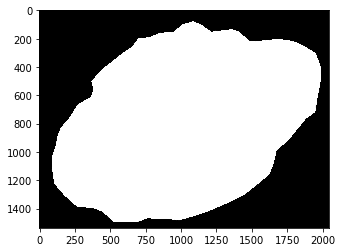

In [33]:
plt.imsave('images/'+TARGET+'2_'+filename,map_image)
img2 = plt.imread(filename)
plt.imshow(img2)
plt.show()

In [34]:
def create_map(filename):
    # LECTURA DE IMAGEN
    img = cv2. imread(IMPATH+filename)
    if (img is None) or (len(img)==0):
        return 
    # LECTURA DE MELANOMA SEGMENT
    seg = cv2. imread(SEGPATH+filename[:12]+'_segmentation.png')
    if (seg is None) or (len(seg)==0):
        return 
    
    # LECTURA DE MASCARAS
    streak = cv2.imread(ATRPATH+filename[:12]+'_attribute_streaks.png')
    globules = cv2.imread(ATRPATH+filename[:12]+'_attribute_globules.png')
    milia =  cv2.imread(ATRPATH+filename[:12]+'_attribute_milia_like_cyst.png')
    pigment = cv2.imread(ATRPATH+filename[:12]+'_attribute_pigment_network.png')
    negative = cv2.imread(ATRPATH+filename[:12]+'_attribute_negative_network.png')
    
    #JUNTAMOS LAS MASCARAS
    map_image = np.zeros(img.shape, dtype=int)
    # PARA ESCOGER LOS COLORES QUE DESEES  -> https://htmlcolorcodes.com/es/
    map_image[seg[:,:,1]>0,:]=[255,255,255] # WHITE
    if(TARGET == 'MAP'):

        map_image[globules[:,:,1]>0,:] = [255,0,0] # RED
        map_image[milia[:,:,1]>0,:] = [0,128,0]  # GREEN  
        map_image[pigment[:,:,1]>0,:] = [255,255,0]  # YELLOW
        map_image[streak[:,:,1]> 0,:] = [0,0,255]  # BLUE
        map_image[negative[:,:,1]>0,:] = [0,255,255] # AQUA

    map_image = Image.fromarray(np.uint8(map_image))
    map_image = np.array(map_image)

    map_image = cv2.resize(map_image, (IMG_HEIGHT, IMG_WIDTH))

    img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
    
    plt.imsave(OUPATH+filename,map_image)
    cv2.imwrite(INPATH+filename,img)

In [35]:
imgurls = os.listdir(IMPATH)
results = Parallel(n_jobs=16)(delayed(create_map)(filename) for filename in tqdm(imgurls))
del results
print('Total images '+':', len(imgurls))
print('Total map    '+':', len(imgurls))

100%|██████████| 2596/2596 [04:26<00:00,  7.87it/s]


Total images : 2596
Total map    : 2596
